In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Data Processing

The padova dataset is used. 
Precipitation: 1725-2022
T: 1774-1997

(Marani, M. and Zanetti, S., 2015. Long‐term oscillations in rainfall extremes in a 268 year daily time series. Water Resources Research, 51(1), pp.639-647.)


In [2]:
df_ = pd.read_csv('dataset/padova/PADOVA_1725_2022_PRCPdaily_reorganize.csv')
df_['Date'] = pd.to_datetime((df_.YY*10000+df_.MM*100+df_.DD).apply(str),format='%Y%m%d')
df_ = df_.drop(['DD', 'MM', 'YY'], axis=1)[['Date', 'PRCP']]
df_.head()

,Date,PRCP
0,1725-01-01,0.0
1,1725-01-02,0.0
2,1725-01-03,0.0
3,1725-01-04,0.0
4,1725-01-05,0.0


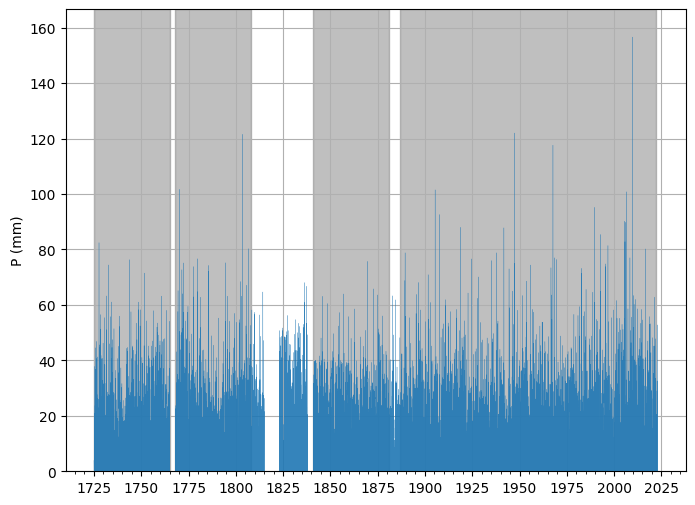

In [3]:
fig, ax = plt.subplots(figsize=(8, 6))

# Plotting precipitation
ax.plot(df_['Date'], df_['PRCP'], label='P (mm)', alpha=0.9, linewidth=0.2)

# Styling the axis
ax.set_ylim([df_['PRCP'].min(), df_['PRCP'].max()+10])
ax.set_ylabel('P (mm)')


ax.xaxis.set_major_locator(mdates.YearLocator(25))
ax.xaxis.set_minor_locator(mdates.YearLocator(5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    # Rotates and right-aligns the x labels so they don't crowd each other.
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=0, horizontalalignment='center')

ax.grid(True)

# Study period (Marani, 2015)
plt.axvspan(np.datetime64('1725-01-01'), np.datetime64('1764-12-31'), color='grey', alpha=0.5)
plt.axvspan(np.datetime64('1768-01-01'), np.datetime64('1807-12-31'), color='grey', alpha=0.5)
plt.axvspan(np.datetime64('1841-01-01'), np.datetime64('1880-12-31'), color='grey', alpha=0.5)
plt.axvspan(np.datetime64('1887-01-01'), np.datetime64('2021-12-31'), color='grey', alpha=0.5)

Only consider precipitation > 0.1 mm

In [5]:
df = df_[df_['PRCP'] > 0.1]
df

,Date,PRCP
16,1725-01-17,2.7940
17,1725-01-18,3.9624
22,1725-01-23,3.0480
23,1725-01-24,3.4290
74,1725-03-16,3.6576
...,...,...
103708,2022-12-11,18.2000
103712,2022-12-15,20.2000
103713,2022-12-16,1.6000
103726,2022-12-29,1.6000


## Daily Rainfall Survival Probability $\Psi(x)$ for the period 1841-2006

In [7]:
def surv_prob(startYear, endYear):
    P_sorted = np.sort(df[(df['Date'] < str(endYear)+'-12-31') & (df['Date'] > str(startYear)+'-01-01')]['PRCP'].values)
    N = len(P_sorted)
    rank = np.arange(N) + 1
    surv_prob_ = 1 - rank / (N+1)
    return (P_sorted, surv_prob_)

yearly_surv_probs_ = []
startYear = 1841
endYear = 2006

for i in range(startYear, endYear + 1):
    yearly_surv_probs_.append(surv_prob(i, i))

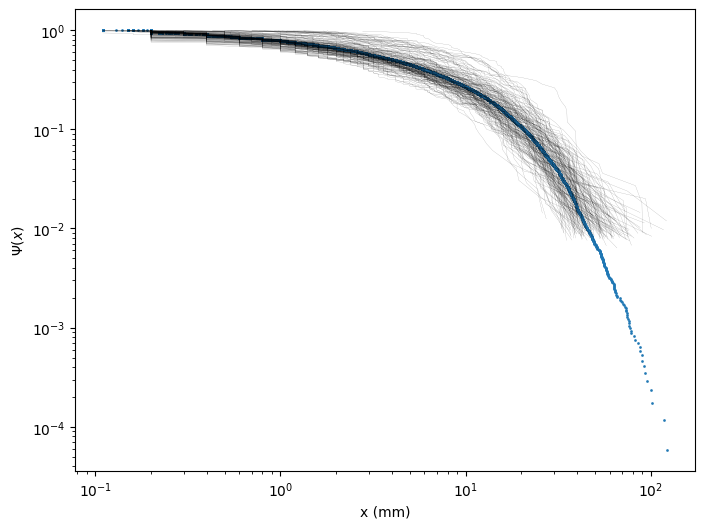

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('x (mm)')
ax.set_ylabel(r'$\Psi(x)$')

# Daily Rainfall Survival Probability for each single year
ax.scatter(*surv_prob(1841, 2006), label='1841 - 2006', alpha=0.9, s=1)
for a in yearly_surv_probs_:
    ax.plot(*a, c='k', alpha=0.6, linewidth=0.1)
